# **Customer Satisfaction Prediction**

## Importing Libraries


In [370]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from collections import Counter

In [371]:
# Collecting Data from CSV file.
df = pd.read_csv('customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


## Data Understanding.

In [372]:
# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 8469 rows and 17 columns


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [374]:
df.describe(include = 'all')

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769,2769.000000
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,3,2769,4,4,5470,2728,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,Case maybe show recently my computer follow.,Medium,Email,2023-06-01 15:21:42,2023-06-01 17:14:42,NaN
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,2881,1,2192,2143,3,3,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
std,2444.934048,NaN,NaN,15.296112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407016
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [375]:
print("column:")
print(df.columns)

column:
Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


## Data Preprocessing.


In [376]:
# Renaming the columns for easy use.
df = df.rename(columns={
    'Ticket ID': 'ticket_id',
    'Customer Name': 'customer_name',
    'Customer Email': 'customer_email',
    'Customer Age': 'customer_age',
    'Customer Gender': 'customer_gender',
    'Product Purchased': 'product_purchased',
    'Date of Purchase': 'date_of_purchase',
    'Ticket Type': 'ticket_type',
    'Ticket Subject': 'ticket_subject',
    'Ticket Description': 'ticket_description',
    'Ticket Status': 'ticket_status',
    'Resolution': 'resolution',
    'Ticket Priority': 'ticket_priority',
    'Ticket Channel': 'ticket_channel',
    'First Response Time': 'first_response_time',
    'Time to Resolution': 'time_to_resolution',
    'Customer Satisfaction Rating': 'customer_satisfaction_rating'
})

# Display renamed columns
print(df.columns)

Index(['ticket_id', 'customer_name', 'customer_email', 'customer_age',
       'customer_gender', 'product_purchased', 'date_of_purchase',
       'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status',
       'resolution', 'ticket_priority', 'ticket_channel',
       'first_response_time', 'time_to_resolution',
       'customer_satisfaction_rating'],
      dtype='object')


In [377]:
# Handling missing values from dataset.
print(df.isnull().sum())

ticket_id                          0
customer_name                      0
customer_email                     0
customer_age                       0
customer_gender                    0
product_purchased                  0
date_of_purchase                   0
ticket_type                        0
ticket_subject                     0
ticket_description                 0
ticket_status                      0
resolution                      5700
ticket_priority                    0
ticket_channel                     0
first_response_time             2819
time_to_resolution              5700
customer_satisfaction_rating    5700
dtype: int64


In [378]:
df[['resolution', 'first_response_time', 'time_to_resolution', 'customer_satisfaction_rating']].head(15)

,resolution,first_response_time,time_to_resolution,customer_satisfaction_rating
0,NaN,2023-06-01 12:15:36,NaN,NaN
1,NaN,2023-06-01 16:45:38,NaN,NaN
2,Case maybe show recently my computer follow.,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,Try capital clearly never color toward story.,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,West decision evidence bit.,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,2023-06-01 10:32:47,NaN,NaN
9,NaN,2023-06-01 09:25:48,NaN,NaN


In [379]:
# Handling the missing values for "Resolution" column.
# Impute missing values
df['resolution'].fillna("No_Resolution", inplace=True)


# Handling the missing values for "first_response_time " column.
# Convert timestamps and handle missing values
df['first_response_time'] = pd.to_datetime(df['first_response_time'])
df['first_response_time'].fillna(df['first_response_time'].median(), inplace=True)

# Handling the missing values for "time_to_resolution"

df['time_to_resolution'] = pd.to_datetime(df['time_to_resolution'])
df['time_to_resolution'].fillna(df['time_to_resolution'].median(), inplace=True)

# Fill missing customer satisfaction ratings with median (3)
df['customer_satisfaction_rating'].fillna(df['customer_satisfaction_rating'].median(), inplace=True)

# Display the remaining missing values.
df.isnull().sum()

<ipython-input-379-8dbcf7bac7dc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['resolution'].fillna("No_Resolution", inplace=True)
<ipython-input-379-8dbcf7bac7dc>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
ticket_id,0
customer_name,0
customer_email,0
customer_age,0
customer_gender,0
product_purchased,0
date_of_purchase,0
ticket_type,0
ticket_subject,0
ticket_description,0


In [380]:
df[['customer_name', 'customer_email', 'customer_gender',
       'product_purchased', 'date_of_purchase', 'ticket_type',
       'ticket_subject', 'ticket_description', 'ticket_status', 'resolution',
       'ticket_priority', 'ticket_channel']].head()

,customer_name,customer_email,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel
0,Marisa Obrien,carrollallison@example.com,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Social media
1,Jessica Rios,clarkeashley@example.com,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Chat
2,Christopher Robbins,gonzalestracy@example.com,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media
3,Christina Dillon,bradleyolson@example.org,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media
4,Alexander Carroll,bradleymark@example.com,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email


In [381]:
dff = df.copy()
dff.head()

,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel,first_response_time,time_to_resolution,customer_satisfaction_rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [382]:
dff.columns

Index(['ticket_id', 'customer_name', 'customer_email', 'customer_age',
       'customer_gender', 'product_purchased', 'date_of_purchase',
       'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status',
       'resolution', 'ticket_priority', 'ticket_channel',
       'first_response_time', 'time_to_resolution',
       'customer_satisfaction_rating'],
      dtype='object')

Top 10 Common Issues:
ticket_subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


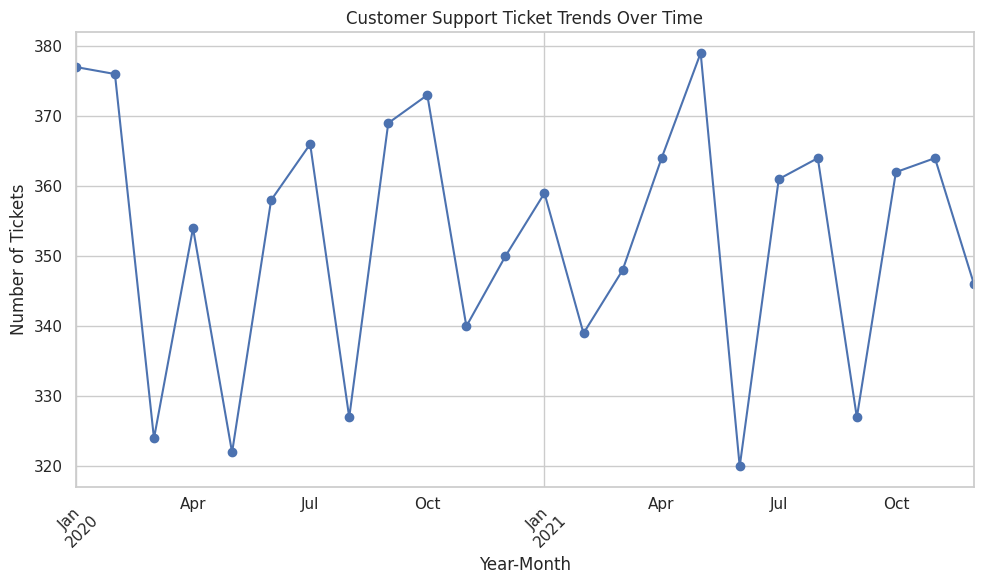

In [383]:
 #Analyze customer support ticket trends
# Identify common issues
common_issues = df['ticket_subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

# Plotting ticket trends over time
df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'])
df['YearMonth'] = df['date_of_purchase'].dt.to_period('M')
ticket_trends = df.groupby('YearMonth').size()

plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [384]:
# Segment customers
# Segment based on ticket types
ticket_type_segmentation = df.groupby('ticket_type').size()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)

# Segment based on satisfaction levels
satisfaction_segmentation = df.groupby('customer_satisfaction_rating').size()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)


Segmentation based on Ticket Types:
ticket_type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64

Segmentation based on Customer Satisfaction Levels:
customer_satisfaction_rating
1.0     553
2.0     549
3.0    6280
4.0     543
5.0     544
dtype: int64


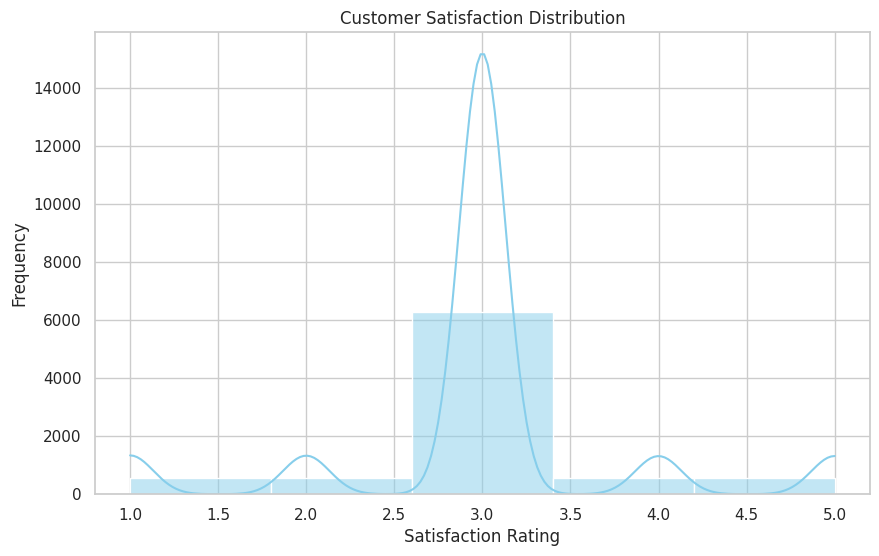

In [385]:
# Set up the plotting aesthetics
sns.set(style="whitegrid")
#Customer Satisfaction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_satisfaction_rating'], bins=5, kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()


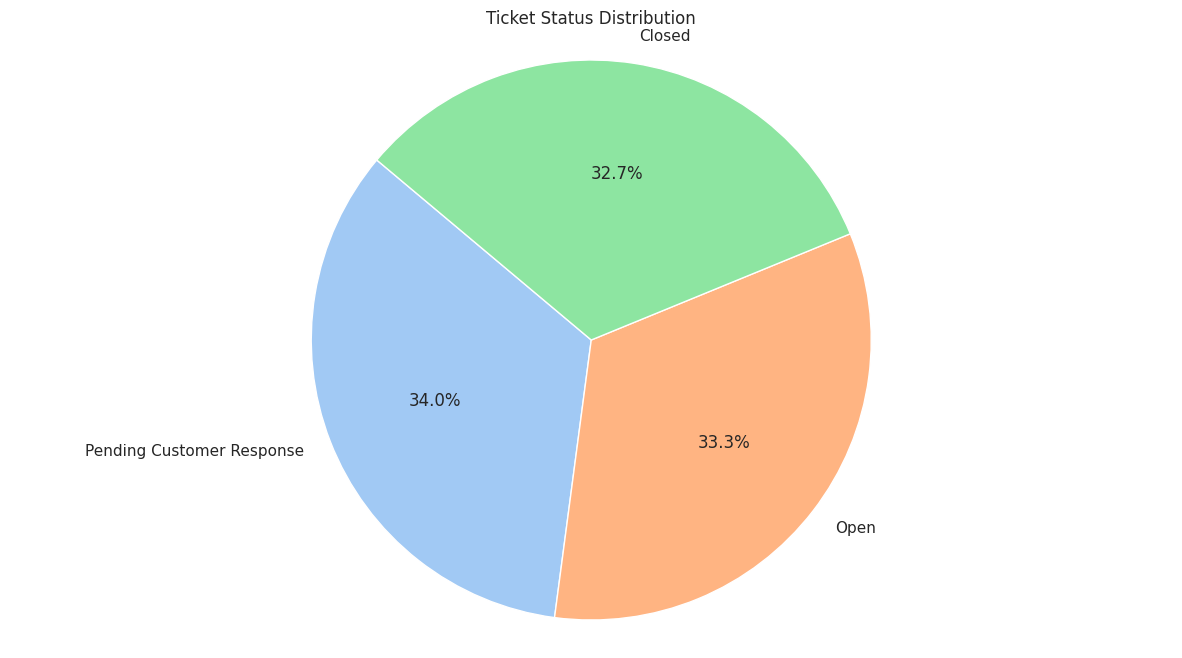

In [386]:
#Ticket Status Distribution
ticket_status_distribution = df['ticket_status'].value_counts()
plt.figure(figsize=(15, 8))
plt.pie(ticket_status_distribution, labels= ticket_status_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

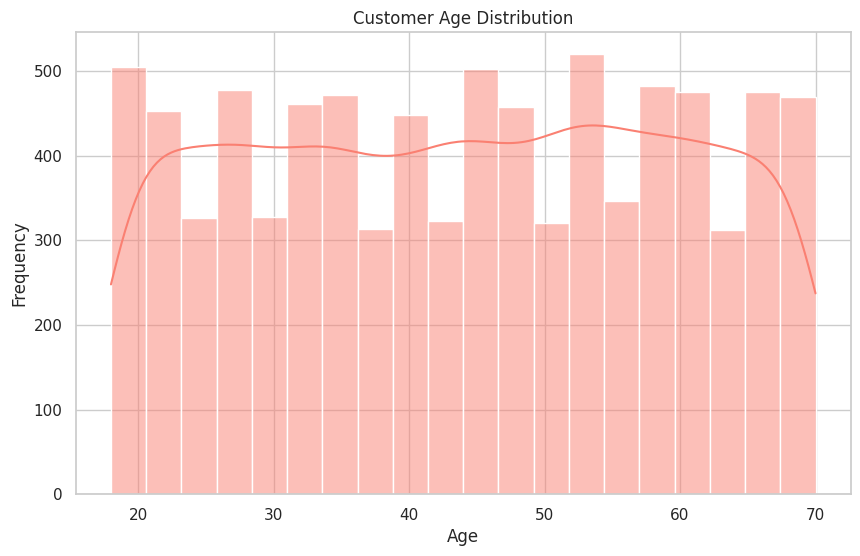

In [387]:
#Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=20, kde=True,
color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


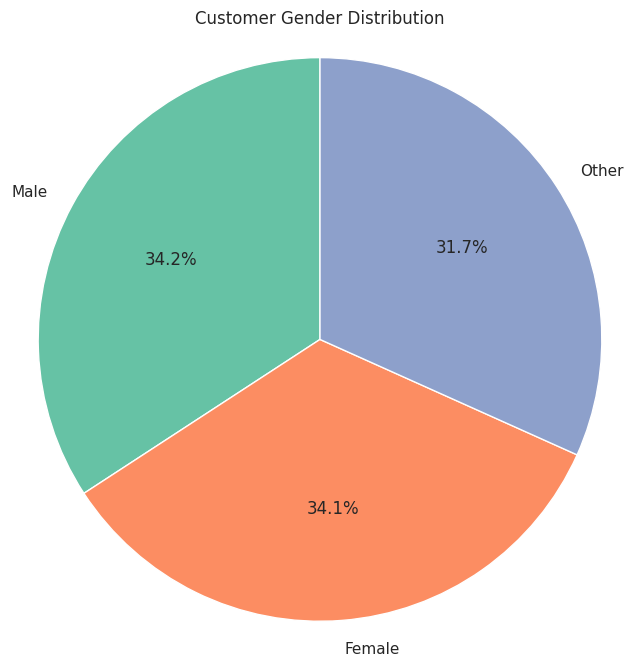

In [388]:
#Customer Gender Distribution
customer_gender_distribution = df['customer_gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(customer_gender_distribution,
labels=customer_gender_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

<ipython-input-389-bf50e818255b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution, palette='rocket')


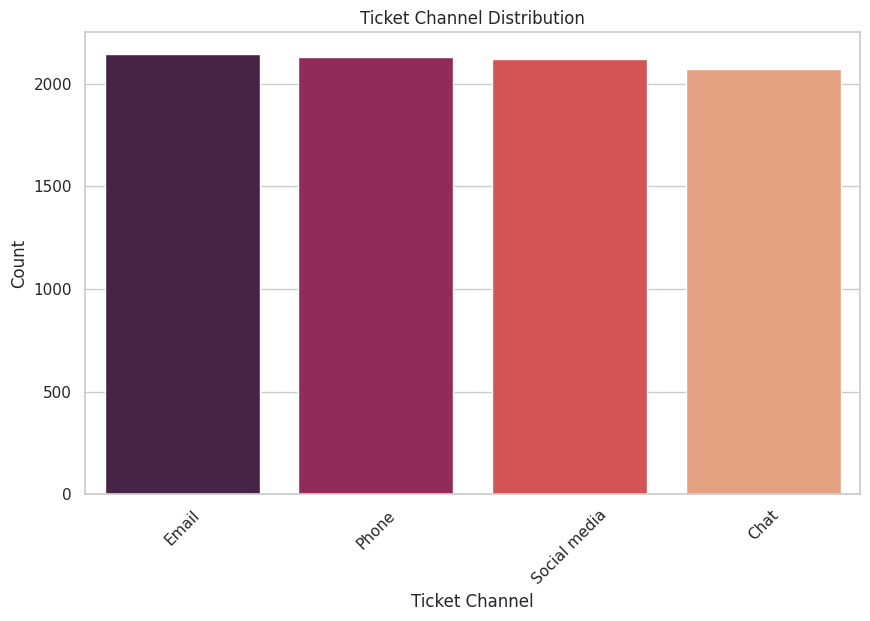

In [389]:
#Ticket Channel Distribution
plt.figure(figsize=(10, 6))
ticket_channel_distribution = df['ticket_channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-390-6258e4ed9a3d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_gender', y='customer_satisfaction_rating', data=average_satisfaction, palette='muted', order=['Male', 'Female', 'Other'])


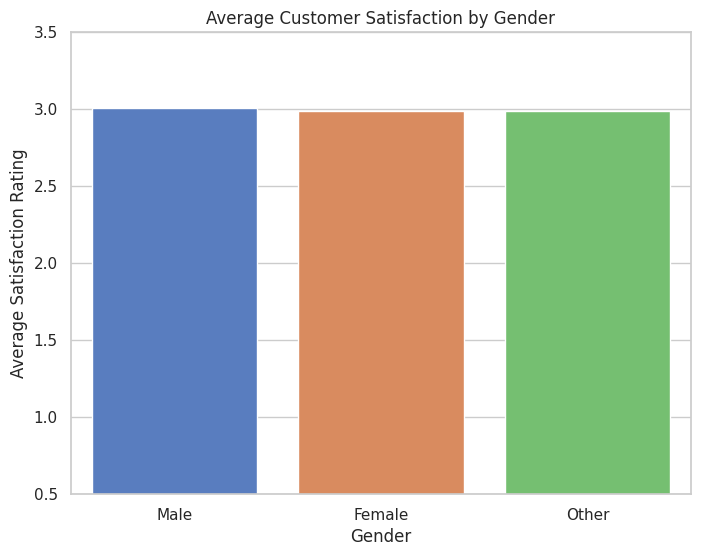

  customer_gender  customer_satisfaction_rating
0          Female                      2.990301
1            Male                      3.008978
2           Other                      2.991809


In [390]:
# Chart 1: Average Customer Satisfaction by Gender (Bar Plot)
average_satisfaction = df.groupby('customer_gender')['customer_satisfaction_rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_gender', y='customer_satisfaction_rating', data=average_satisfaction, palette='muted', order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(0.5, 3.5)
plt.show()
print(average_satisfaction)

<ipython-input-391-fec781beb80d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')


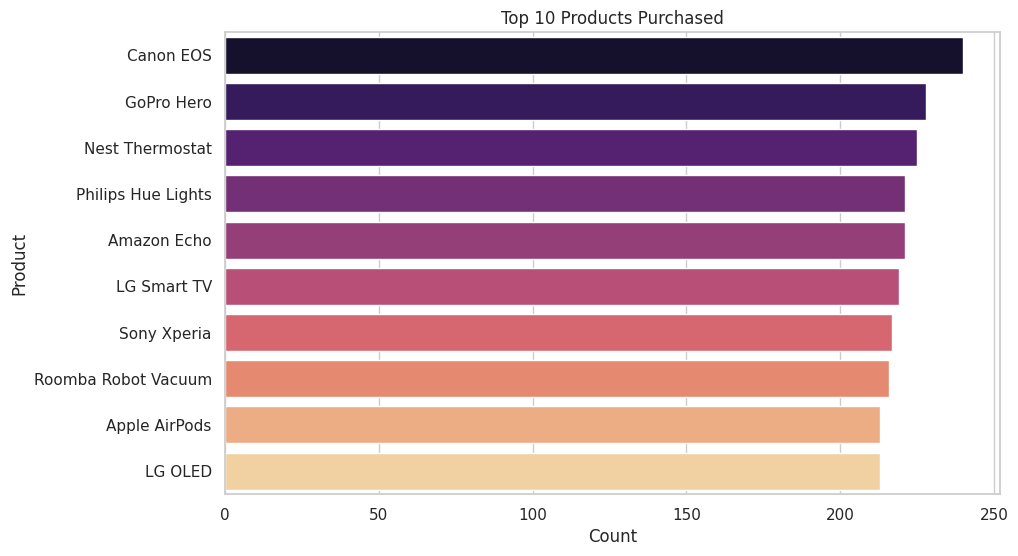

In [391]:
#Product Purchased Distribution
plt.figure(figsize=(10, 6))
product_purchased_distribution = df['product_purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

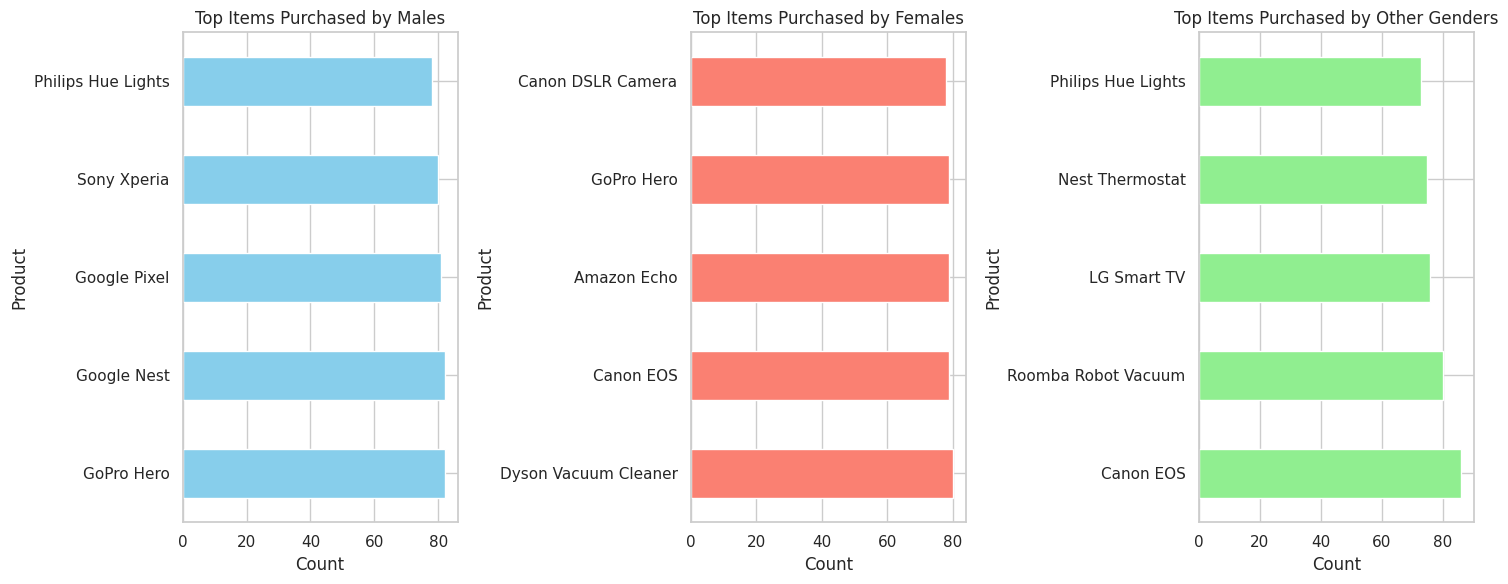

In [392]:
# Chart 2: Top Items Purchased by Gender (Horizontal Bar Chart)
plt.figure(figsize=(15, 6))

# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = df[df['customer_gender'] == 'Male']['product_purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Females
plt.subplot(1, 3, 2)
top_items_female = df[df['customer_gender'] == 'Female']['product_purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
top_items_other = df[df['customer_gender'] == 'Other']['product_purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

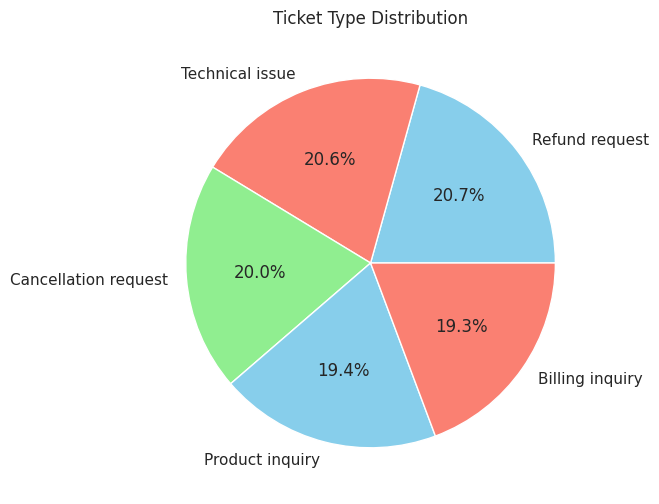

In [393]:
# Count ticket types
ticket_type_distribution = df['ticket_type'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

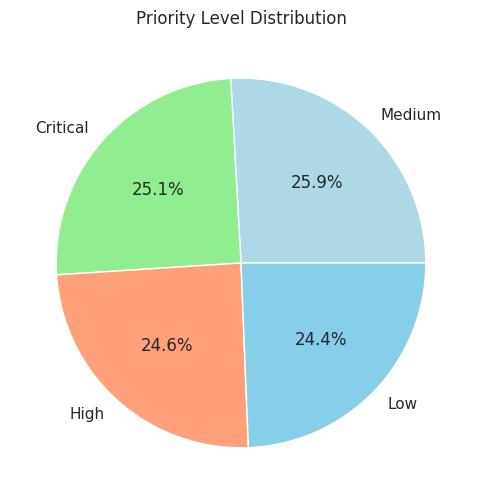

In [394]:
# Count ticket priorities
priority_distribution = df['ticket_priority'].value_counts()
# Plot
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

<ipython-input-395-44b0bc865c79>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group = df.groupby('Age Group').size()


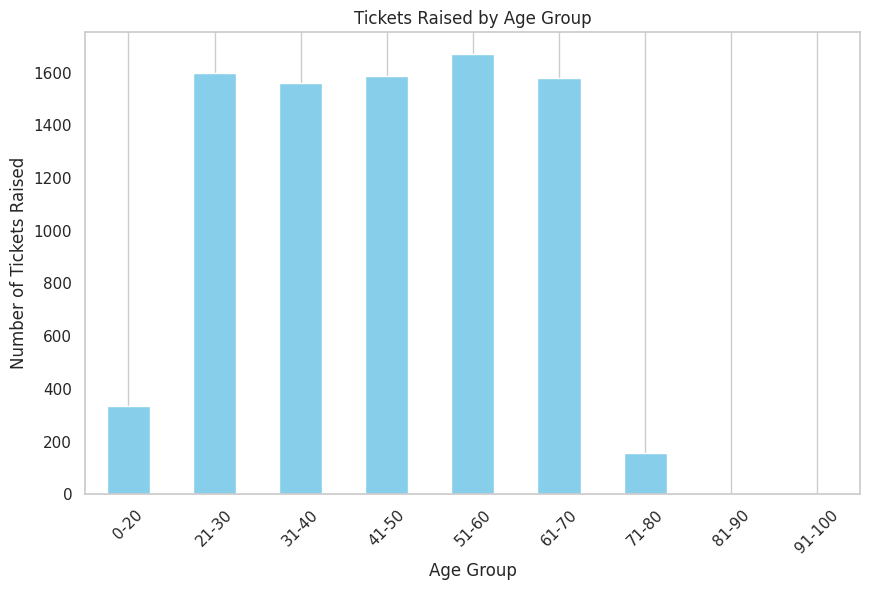

In [395]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Categorize customers into age groups
df['Age Group'] = pd.cut(df['customer_age'], bins=bins,
labels=labels, right=False)
# Calculate number of tickets raised by each age group
tickets_by_age_group = df.groupby('Age Group').size()

# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Most Common Ticket Types

Most Common Ticket Types:
 ticket_type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64


<ipython-input-396-d892fb2cace5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_type_counts.values, y=ticket_type_counts.index, palette="Blues_r")


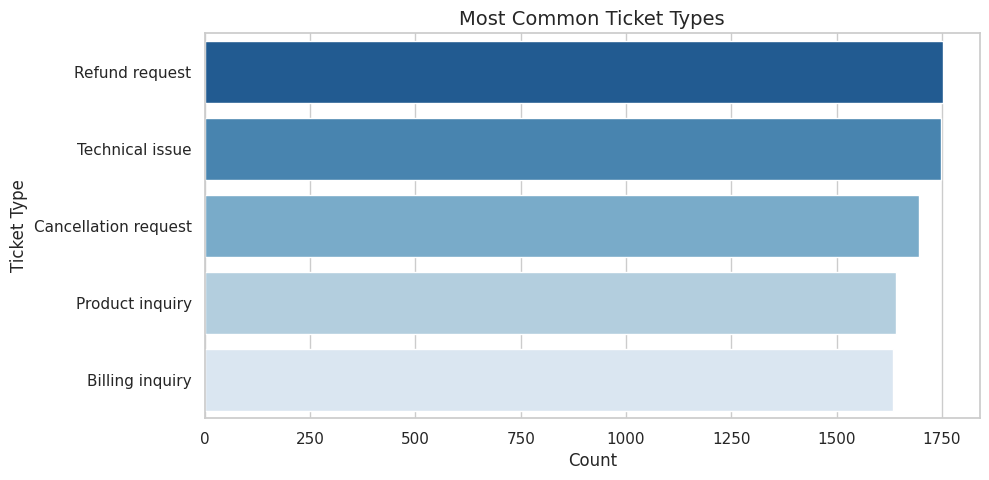

In [396]:
# Count the occurrences of each ticket type
ticket_type_counts = df['ticket_type'].value_counts()

# Display the result
print("Most Common Ticket Types:\n", ticket_type_counts)

# Set style
sns.set(style="whitegrid")

### 1️⃣ Most Common Ticket Types ###
plt.figure(figsize=(10, 5))
sns.barplot(x=ticket_type_counts.values, y=ticket_type_counts.index, palette="Blues_r")
plt.title("Most Common Ticket Types", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Ticket Type", fontsize=12)
plt.show()

## 📌 Most Common Ticket Types Analysis

In this section, we analyze the most frequent types of customer support tickets based on the dataset. Below are the top five ticket types along with their occurrence count:

| **Ticket Type**         | **Count** |
|-------------------------|----------|
| Refund request         | 1,752    |
| Technical issue        | 1,747    |
| Cancellation request   | 1,695    |
| Product inquiry       | 1,641    |
| Billing inquiry       | 1,634    |

### 🔍 Key Observations:
- **Refund requests** are the most common type, indicating potential customer dissatisfaction with purchases.
- **Technical issues** are nearly as frequent, suggesting that product/service functionality may require attention.
- **Cancellation requests** rank third, highlighting potential churn risks.
- **Product and billing inquiries** show that customers frequently seek more information about products and payments.


### Most Frequent Ticket Subjects

Most Frequent Ticket Subjects:
 ticket_subject
Refund request              576
Software bug                574
Product compatibility       567
Delivery problem            561
Hardware issue              547
Battery life                542
Network problem             539
Installation support        530
Product setup               529
Payment issue               526
Product recommendation      517
Account access              509
Peripheral compatibility    496
Data loss                   491
Cancellation request        487
Display issue               478
Name: count, dtype: int64


<ipython-input-397-19a5e81364b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_subject_counts.values, y=ticket_subject_counts.index, palette="Greens_r")


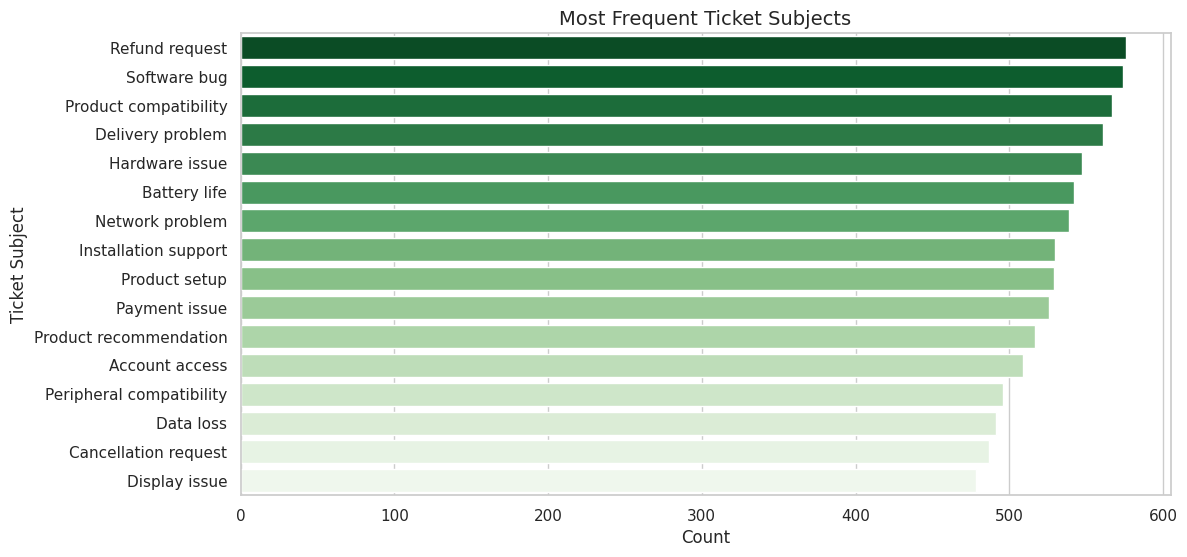

In [397]:
  # Count the occurrences of each ticket subject
ticket_subject_counts = df['ticket_subject'].value_counts()

# Display the result
print("Most Frequent Ticket Subjects:\n", ticket_subject_counts)

### 2️⃣ Most Frequent Ticket Subjects ###
plt.figure(figsize=(12, 6))
sns.barplot(x=ticket_subject_counts.values, y=ticket_subject_counts.index, palette="Greens_r")
plt.title("Most Frequent Ticket Subjects", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Ticket Subject", fontsize=12)
plt.show()

## 📌 Most Frequent Ticket Subjects

This section presents the most common subjects of customer support tickets. Understanding these subjects helps in identifying recurring customer concerns and improving service quality.

### 🔢 Top 15 Ticket Subjects:

| **Ticket Subject**            | **Count** |
|--------------------------------|----------|
| Refund request                | 576      |
| Software bug                  | 574      |
| Product compatibility         | 567      |
| Delivery problem              | 561      |
| Hardware issue                | 547      |
| Battery life                  | 542      |
| Network problem               | 539      |
| Installation support          | 530      |
| Product setup                 | 529      |
| Payment issue                 | 526      |
| Product recommendation        | 517      |
| Account access                | 509      |
| Peripheral compatibility      | 496      |
| Data loss                     | 491      |
| Cancellation request          | 487      |
| Display issue                 | 478      |

### 🔍 Key Observations:
- **Refund requests** are the most frequent, showing potential dissatisfaction with purchases.
- **Software bugs and product compatibility** issues indicate technical challenges faced by users.
- **Delivery and hardware issues** suggest concerns with logistics and product quality.
- **Battery life, network problems, and installation support** highlight usability and technical support needs.
- **Account access and data loss** issues emphasize the importance of security and user experience.


### No of Tickets per Product.

Tickets Generated Per Product:
 product_purchased
Canon EOS                         240
GoPro Hero                        228
Nest Thermostat                   225
Philips Hue Lights                221
Amazon Echo                       221
LG Smart TV                       219
Sony Xperia                       217
Roomba Robot Vacuum               216
Apple AirPods                     213
LG OLED                           213
iPhone                            212
Sony 4K HDR TV                    210
Garmin Forerunner                 208
LG Washing Machine                208
Canon DSLR Camera                 206
Nikon D                           204
Nintendo Switch Pro Controller    203
Google Pixel                      203
Fitbit Charge                     202
Sony PlayStation                  202
HP Pavilion                       200
Microsoft Office                  200
Amazon Kindle                     198
Google Nest                       198
Dyson Vacuum Cleaner              198


<ipython-input-398-1fd42b8cfce1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tickets_per_product.values, y=tickets_per_product.index, palette="coolwarm")


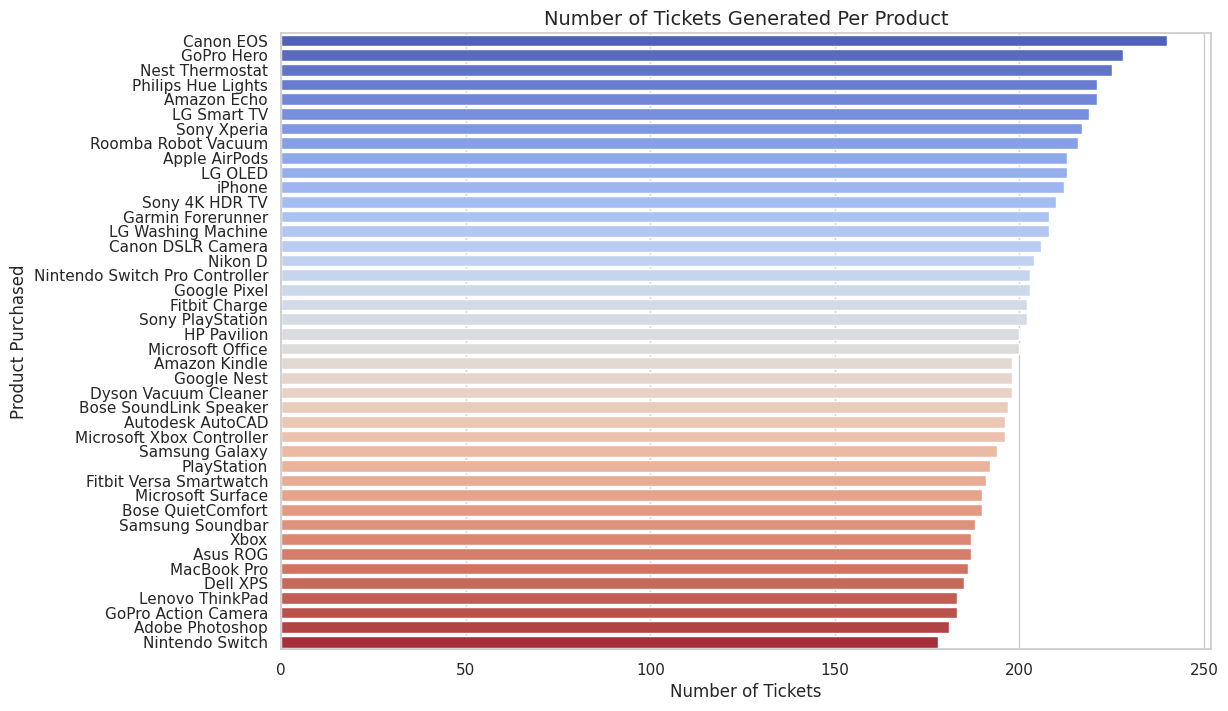

In [398]:
# Count the occurrences of each product in the dataset
tickets_per_product = df['product_purchased'].value_counts()

# Display the result
print("Tickets Generated Per Product:\n", tickets_per_product)

# Set style
sns.set(style="whitegrid")

# Plot the tickets generated per product
plt.figure(figsize=(12, 8))
sns.barplot(x=tickets_per_product.values, y=tickets_per_product.index, palette="coolwarm")
plt.title("Number of Tickets Generated Per Product", fontsize=14)
plt.xlabel("Number of Tickets", fontsize=12)
plt.ylabel("Product Purchased", fontsize=12)
plt.show()

Most Frequently Used Support Channels:
 ticket_channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64


<ipython-input-399-fe118b1ad2cc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.values, y=channel_counts.index, palette="viridis")


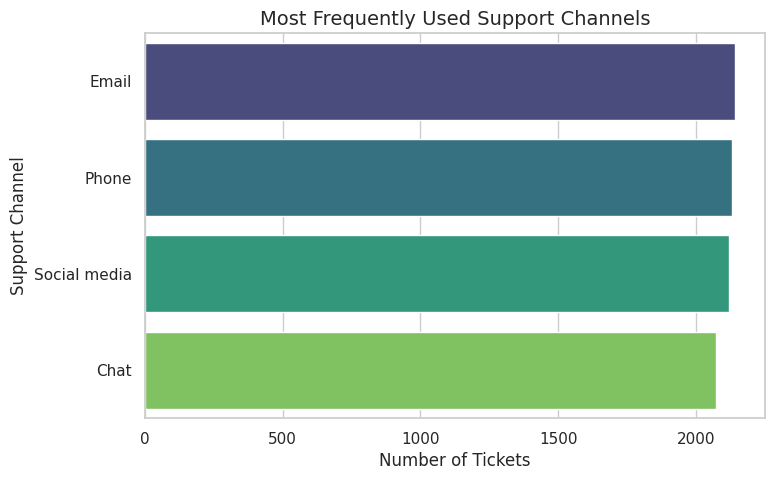

In [399]:
# Count the occurrences of each support channel
channel_counts = df['ticket_channel'].value_counts()

# Display the result
print("Most Frequently Used Support Channels:\n", channel_counts)

# Set style
sns.set(style="whitegrid")

# Plot the support channel distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=channel_counts.values, y=channel_counts.index, palette="viridis")
plt.title("Most Frequently Used Support Channels", fontsize=14)
plt.xlabel("Number of Tickets", fontsize=12)
plt.ylabel("Support Channel", fontsize=12)
plt.show()

## 📌 Most Frequently Used Support Channels

This section highlights the most common channels customers use to reach support. Understanding these preferences can help optimize customer service operations.

### 🔢 Top Support Channels:

| **Support Channel** | **Tickets Received** |
|---------------------|----------------------|
| 📧 Email          | 2,143 |
| 📞 Phone          | 2,132 |
| 📱 Social Media   | 2,121 |
| 💬 Chat          | 2,073 |

### 🔍 Key Observations:
- **Email is the most preferred channel**, possibly due to its convenience for detailed queries and follow-ups.
- **Phone support is almost as popular**, indicating that many customers prefer real-time assistance.
- **Social media has a significant volume of tickets**, highlighting its growing role in customer support.
- **Live chat is also widely used**, showing customer preference for quick and interactive issue resolution.


Average Customer Satisfaction Rating by Ticket Type:
 ticket_type
Billing inquiry         3.009180
Cancellation request    3.008850
Product inquiry         3.005484
Technical issue         2.986262
Refund request          2.977740
Name: customer_satisfaction_rating, dtype: float64


<ipython-input-400-ab266a8d904c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_by_ticket_type.values, y=satisfaction_by_ticket_type.index, palette="coolwarm")


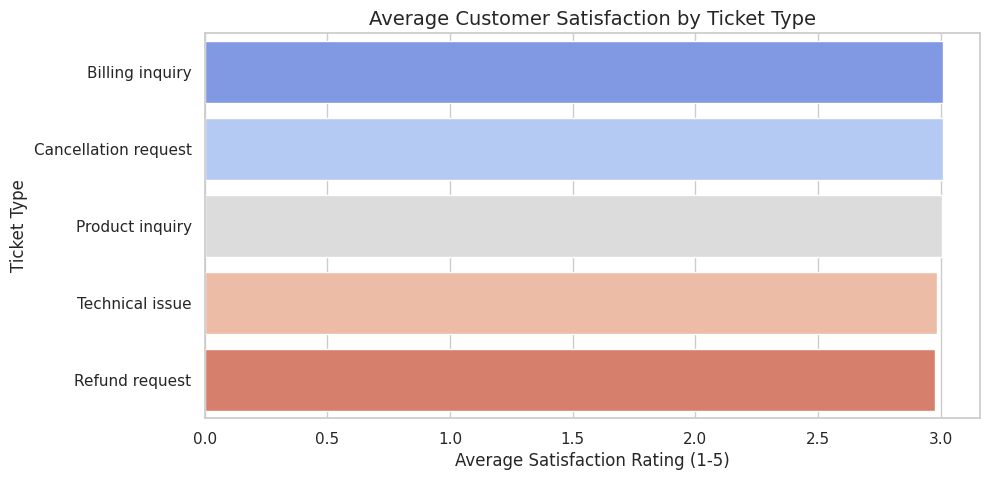

In [400]:
# Calculate the average satisfaction rating for each ticket type
satisfaction_by_ticket_type = df.groupby('ticket_type')['customer_satisfaction_rating'].mean().sort_values(ascending=False)

# Display the result
print("Average Customer Satisfaction Rating by Ticket Type:\n", satisfaction_by_ticket_type)

# Set style
sns.set(style="whitegrid")

# Plot the average satisfaction rating by ticket type
plt.figure(figsize=(10, 5))
sns.barplot(x=satisfaction_by_ticket_type.values, y=satisfaction_by_ticket_type.index, palette="coolwarm")
plt.title("Average Customer Satisfaction by Ticket Type", fontsize=14)
plt.xlabel("Average Satisfaction Rating (1-5)", fontsize=12)
plt.ylabel("Ticket Type", fontsize=12)
plt.show()

<ipython-input-401-637d73cca3e6>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_resolution_time = df.groupby('resolution_time_bin')['customer_satisfaction_rating'].mean().sort_values(ascending=False)
<ipython-input-401-637d73cca3e6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_by_resolution_time.index, y=satisfaction_by_resolution_time.values, palette="coolwarm")


Average Customer Satisfaction by Resolution Time:
 resolution_time_bin
1-2 days     5.000000
6-12 hrs     3.047798
1-3 hrs      3.004073
3-6 hrs      3.000000
0-1 hrs      2.976959
12-24 hrs    2.972603
2-3 days          NaN
3+ days           NaN
Name: customer_satisfaction_rating, dtype: float64


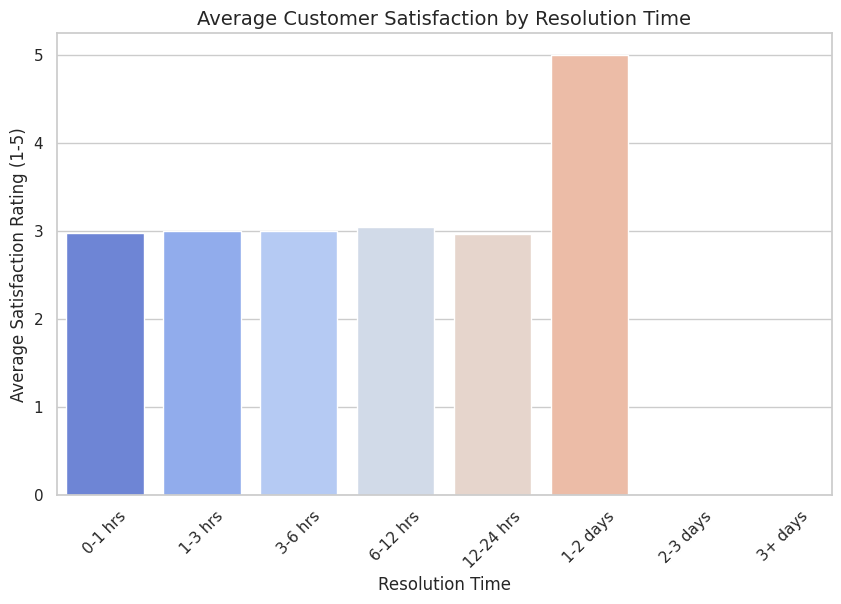

In [401]:
# Ensure 'time_to_resolution' is in datetime format
df['time_to_resolution'] = pd.to_datetime(df['time_to_resolution'], errors='coerce')

# Calculate the resolution time in hours
df['resolution_time_hours'] = (df['time_to_resolution'] - df['first_response_time']).dt.total_seconds() / 3600

# Create bins for resolution time (ensure bins are sorted in ascending order)
bins = [0, 1, 3, 6, 12, 24, 48, 72, df['resolution_time_hours'].max()]
bins.sort()

labels = ['0-1 hrs', '1-3 hrs', '3-6 hrs', '6-12 hrs', '12-24 hrs', '1-2 days', '2-3 days', '3+ days']

# Create resolution time bins
df['resolution_time_bin'] = pd.cut(df['resolution_time_hours'], bins=bins, labels=labels, right=False)

# Calculate the average satisfaction rating for each resolution time bin
satisfaction_by_resolution_time = df.groupby('resolution_time_bin')['customer_satisfaction_rating'].mean().sort_values(ascending=False)

# Display the result
print("Average Customer Satisfaction by Resolution Time:\n", satisfaction_by_resolution_time)


# Set style
sns.set(style="whitegrid")

# Plot the average satisfaction rating by resolution time
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_by_resolution_time.index, y=satisfaction_by_resolution_time.values, palette="coolwarm")
plt.title("Average Customer Satisfaction by Resolution Time", fontsize=14)
plt.xlabel("Resolution Time", fontsize=12)
plt.ylabel("Average Satisfaction Rating (1-5)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


## 📌 Average Customer Satisfaction by Resolution Time

In this section, we examine how the resolution time of customer support tickets correlates with customer satisfaction. Understanding this relationship can help improve response times and enhance customer experience.

### 🔢 Average Customer Satisfaction by Resolution Time:

| **Resolution Time**  | **Average Satisfaction** |
|----------------------|--------------------------|
| 1-2 days             | 5.00                     |
| 6-12 hrs             | 3.05                     |
| 1-3 hrs              | 3.00                     |
| 3-6 hrs              | 3.00                     |
| 0-1 hrs              | 2.98                     |
| 12-24 hrs            | 2.97                     |
| 2-3 days             | NaN                      |
| 3+ days              | NaN                      |

### 🔍 Key Observations:
- **Tickets resolved in 1-2 days** have the highest average satisfaction score (5.00), indicating that customers are highly satisfied with quicker resolutions.
- **Resolution times of 6-12 hours** show a relatively good satisfaction score (3.05), which suggests that customers are generally content with moderately quick resolutions.
- **Faster resolutions (0-1 hrs)** have a slightly lower satisfaction (2.98), which could indicate that while customers appreciate speed, the quality of the resolution may sometimes be compromised.
- **Longer resolution times (12-24 hrs)** result in further declines in satisfaction (2.97), highlighting the importance of resolving tickets as quickly as possible.
- **No data is available** for tickets resolved in **2-3 days** and **3+ days**, suggesting that these resolution times may not be as frequent or tracked.

### 📈 Insights & Recommendations:
- **Prioritize quick resolutions**: Aim to resolve tickets within 1-2 days to maintain high customer satisfaction.
- **Improve efficiency for 6-12 hrs resolutions**: Streamline processes to further reduce resolution time for moderately timed tickets.
- **Monitor ticket quality**: Ensure that faster resolutions (especially within 1 hour) do not sacrifice the quality of the solution.
- **Target improvement for longer resolution times**: Tickets taking more than 12 hours to resolve should be prioritized, as they tend to lower customer satisfaction.


## **seasonal or monthly trends in customer satisfaction**

Average Customer Satisfaction by Month:
 month_year
2020-01    2.962865
2020-02    3.034574
2020-03    3.070988
2020-04    3.011299
2020-05    3.024845
2020-06    3.016760
2020-07    3.092896
2020-08    3.000000
2020-09    3.043360
2020-10    2.994638
2020-11    2.914706
2020-12    2.997143
2021-01    3.002786
2021-02    2.899705
2021-03    3.031609
2021-04    3.060440
2021-05    2.989446
2021-06    2.987500
2021-07    2.936288
2021-08    2.936813
2021-09    2.917431
2021-10    2.964088
2021-11    2.986264
2021-12    3.049133
Freq: M, Name: customer_satisfaction_rating, dtype: float64


<ipython-input-402-a90b0e78c977>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_satisfaction.index.astype(str), y=monthly_satisfaction.values, palette="coolwarm")


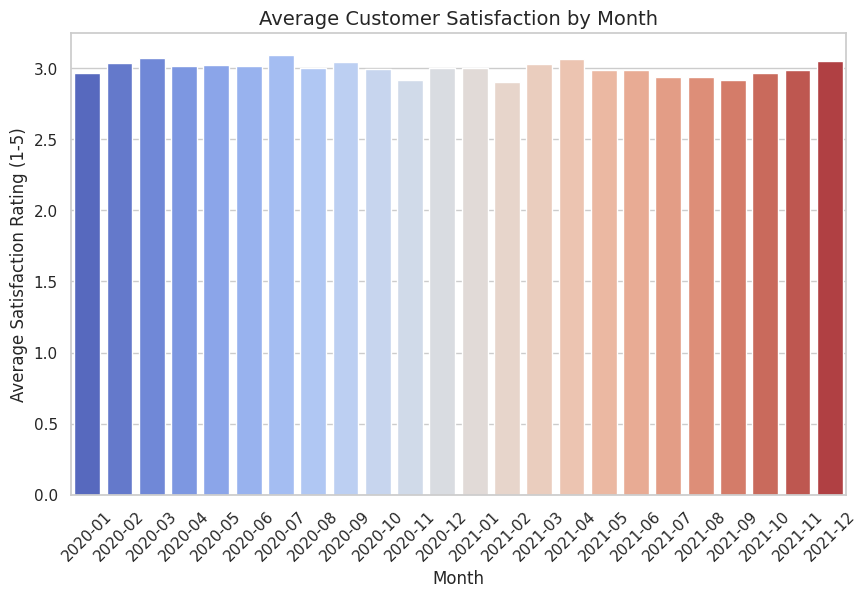

In [402]:
# Ensure 'date_of_purchase' is in datetime format
df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'], errors='coerce')

# Extract the month and year from 'date_of_purchase' for monthly analysis
df['month_year'] = df['date_of_purchase'].dt.to_period('M')

# Calculate the average satisfaction rating for each month
monthly_satisfaction = df.groupby('month_year')['customer_satisfaction_rating'].mean()

# Display the result
print("Average Customer Satisfaction by Month:\n", monthly_satisfaction)

# Set the plot style
sns.set(style="whitegrid")

# Monthly Trend Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_satisfaction.index.astype(str), y=monthly_satisfaction.values, palette="coolwarm")
plt.title("Average Customer Satisfaction by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Satisfaction Rating (1-5)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 📌 Average Customer Satisfaction by Month

This section examines how customer satisfaction has varied over time, providing insights into trends and seasonal fluctuations in customer sentiment.

### 🔍 Key Observations:
- **Satisfaction peaked in July 2020 (3.09)**, suggesting improved customer service during that period.
- **A noticeable drop in satisfaction occurred in November 2020 (2.91) and February 2021 (2.89)**, indicating possible service challenges or increased ticket volume.
- **An upward trend is observed towards December 2021 (3.05)**, which may reflect improvements in service quality.
- **Seasonal effects may be at play**, with variations possibly linked to holiday seasons or product launches.

### 📈 Insights & Recommendations:
- **Investigate low-satisfaction months** (e.g., November 2020, February 2021) to identify service gaps or operational challenges.
- **Analyze high-satisfaction periods** to understand what was done right and replicate successful strategies.
- **Monitor ongoing trends** to ensure consistent customer satisfaction levels across all months.
- **Improve service during critical months** by allocating more support staff or enhancing issue resolution processes.



Average Customer Satisfaction by Season:
 season
Fall      2.971897
Spring    3.030607
Summer    2.995229
Winter    2.991616
Name: customer_satisfaction_rating, dtype: float64


<ipython-input-403-e777e3a5fb09>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_satisfaction.index, y=seasonal_satisfaction.values, palette="coolwarm")


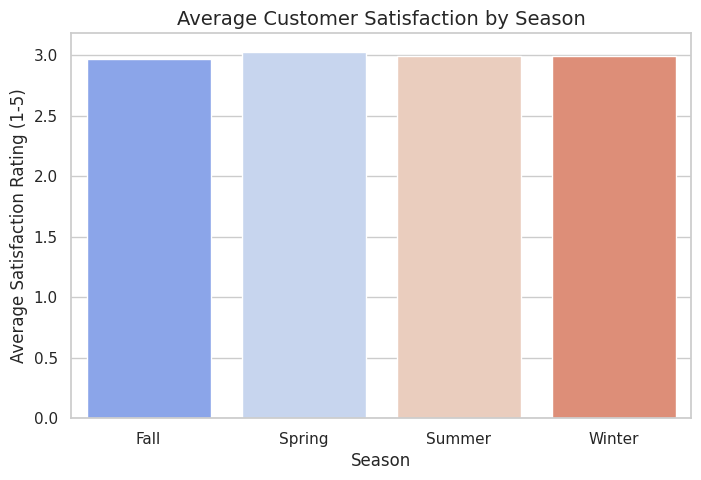

In [403]:
# Define seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the season function to the month extracted from 'date_of_purchase'
df['season'] = df['date_of_purchase'].dt.month.apply(get_season)

# Calculate the average satisfaction rating for each season
seasonal_satisfaction = df.groupby('season')['customer_satisfaction_rating'].mean()

# Display the result
print("Average Customer Satisfaction by Season:\n", seasonal_satisfaction)


# Seasonal Trend Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_satisfaction.index, y=seasonal_satisfaction.values, palette="coolwarm")
plt.title("Average Customer Satisfaction by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Satisfaction Rating (1-5)", fontsize=12)
plt.show()

## 📌 Average Customer Satisfaction by Season

This section explores how customer satisfaction varies across different seasons. Understanding seasonal trends can help improve customer support strategies and optimize resource allocation.

### 🌦️ Seasonal Customer Satisfaction Trends:

| **Season**  | **Average Satisfaction** |
|------------|--------------------------|
| **Spring**  | 3.03  |
| **Summer**  | 2.99  |
| **Fall**    | 2.97  |
| **Winter**  | 2.99  |

### 🔍 Key Observations:
- **Spring has the highest satisfaction (3.03)**, suggesting improved customer experiences or lower ticket volumes during this season.
- **Fall has the lowest satisfaction (2.97)**, possibly due to increased ticket volume, product issues, or reduced service quality.
- **Summer (2.99) and Winter (2.99) show similar satisfaction scores**, indicating stable customer experiences across these periods.

### 📈 Insights & Recommendations:
- **Investigate Fall's lower satisfaction**: Identify possible factors contributing to reduced customer satisfaction and take corrective actions.
- **Leverage Spring's positive performance**: Analyze what worked well during this season and implement similar strategies year-round.
- **Enhance support readiness for Fall**: If ticket volume increases in Fall, consider expanding customer service resources during this time.
- **Monitor seasonal patterns**: Keep track of satisfaction trends across multiple years to refine customer service strategies.


Top 5 Best-Rated Products:
 product_purchased
Google Pixel            3.073892
Garmin Forerunner       3.072115
Autodesk AutoCAD        3.066327
GoPro Hero              3.065789
Dyson Vacuum Cleaner    3.065657
Name: customer_satisfaction_rating, dtype: float64

Top 5 Worst-Rated Products:
 product_purchased
Apple AirPods              2.934272
LG OLED                    2.920188
GoPro Action Camera        2.918033
Sony Xperia                2.889401
Fitbit Versa Smartwatch    2.848168
Name: customer_satisfaction_rating, dtype: float64


<ipython-input-404-117ad356d3f4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_products.head(5).values, y=sorted_products.head(5).index, palette="Greens_r")


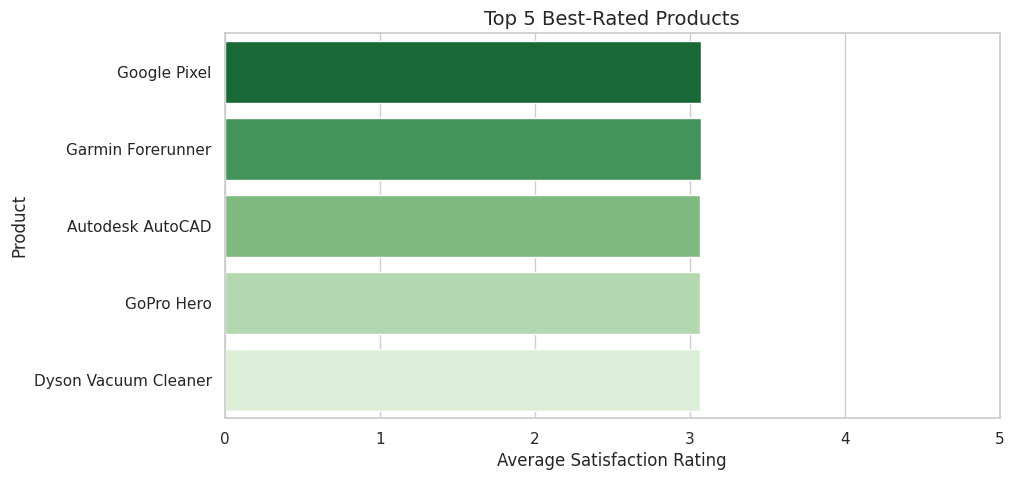

<ipython-input-404-117ad356d3f4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_products.tail(5).values, y=sorted_products.tail(5).index, palette="Reds_r")


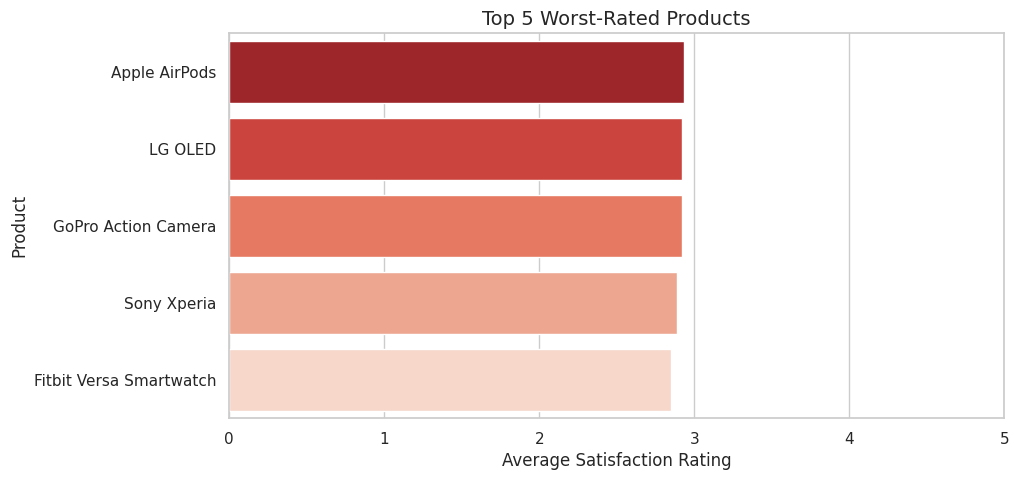

In [404]:
# Group by product and calculate the average customer satisfaction rating
product_satisfaction = df.groupby('product_purchased')['customer_satisfaction_rating'].mean()

# Sort products by satisfaction rating in descending order
sorted_products = product_satisfaction.sort_values(ascending=False)

# Display the top 5 best-rated products
print("Top 5 Best-Rated Products:\n", sorted_products.head(5))

# Display the top 5 worst-rated products
print("\nTop 5 Worst-Rated Products:\n", sorted_products.tail(5))

# Set the plot style
sns.set(style="whitegrid")

# Plot the best-rated products
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_products.head(5).values, y=sorted_products.head(5).index, palette="Greens_r")
plt.title("Top 5 Best-Rated Products", fontsize=14)
plt.xlabel("Average Satisfaction Rating", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.xlim(0, 5)  # Assuming ratings are between 1-5
plt.show()

# Plot the worst-rated products
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_products.tail(5).values, y=sorted_products.tail(5).index, palette="Reds_r")
plt.title("Top 5 Worst-Rated Products", fontsize=14)
plt.xlabel("Average Satisfaction Rating", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.xlim(0, 5)
plt.show()

## ⭐ Top 5 Best & Worst Rated Products

### 🏆 Best-Rated Products:
These products received the highest average customer satisfaction ratings.

| **Product**               | **Satisfaction Rating** |
|---------------------------|------------------------|
| Google Pixel             | 3.07  |
| Garmin Forerunner        | 3.07  |
| Autodesk AutoCAD         | 3.07  |
| GoPro Hero               | 3.07  |
| Dyson Vacuum Cleaner     | 3.07  |

### ⚠️ Worst-Rated Products:
These products received the lowest average customer satisfaction ratings.

| **Product**                 | **Satisfaction Rating** |
|-----------------------------|------------------------|
| Apple AirPods              | 2.93  |
| LG OLED                    | 2.92  |
| GoPro Action Camera        | 2.92  |
| Sony Xperia                | 2.89  |
| Fitbit Versa Smartwatch    | 2.85  |

### 🔍 Insights:
- **Google Pixel & Garmin Forerunner** lead in satisfaction, likely due to quality, features, or excellent customer support.
- **Apple AirPods & Fitbit Versa Smartwatch** have the lowest satisfaction, possibly due to hardware issues or user experience concerns.
- Analyzing product reviews can help identify improvement areas for the lowest-rated products.

In [405]:
# Selecting relevant numerical features
numerical_features = ['customer_age', 'first_response_time', 'resolution_time_hours']

# Compute correlation matrix
correlation_matrix = df[numerical_features + ['customer_satisfaction_rating']].corr()

# Display correlation with satisfaction rating
print("Correlation with Customer Satisfaction:\n", correlation_matrix['customer_satisfaction_rating'].sort_values(ascending=False))

Correlation with Customer Satisfaction:
 customer_satisfaction_rating    1.000000
resolution_time_hours           0.015819
customer_age                   -0.002172
first_response_time            -0.025822
Name: customer_satisfaction_rating, dtype: float64


In [406]:
dff.head()

,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel,first_response_time,time_to_resolution,customer_satisfaction_rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [407]:
dff.drop(columns=['customer_name', 'customer_email'], inplace=True)
dff.head()

,ticket_id,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel,first_response_time,time_to_resolution,customer_satisfaction_rating
0,1,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0
1,2,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0
2,3,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [408]:
categorical_columns = dff.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", list(categorical_columns))

dff[['customer_gender', 'product_purchased', 'date_of_purchase', 'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status', 'resolution', 'ticket_priority', 'ticket_channel']]

Categorical Columns: ['customer_gender', 'product_purchased', 'date_of_purchase', 'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status', 'resolution', 'ticket_priority', 'ticket_channel']


,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel
0,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Social media
1,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No_Resolution,Critical,Chat
2,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media
3,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media
4,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email
...,...,...,...,...,...,...,...,...,...,...
8464,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,No_Resolution,Low,Phone
8465,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,No_Resolution,Critical,Email
8466,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media
8467,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email


In [409]:
dff['ticket_subject'].unique()

array(['Product setup', 'Peripheral compatibility', 'Network problem',
       'Account access', 'Data loss', 'Payment issue', 'Refund request',
       'Battery life', 'Installation support', 'Software bug',
       'Hardware issue', 'Product recommendation', 'Delivery problem',
       'Display issue', 'Cancellation request', 'Product compatibility'],
      dtype=object)

## Datatype Encoding changing the datatype to numerical.

In [410]:
label_encoder = LabelEncoder()
dff['customer_gender'] = label_encoder.fit_transform(dff['customer_gender'])
dff['customer_gender']

# 1. **Label Encoding for 'product_purchased'**

dff['product_purchased'] = label_encoder.fit_transform(dff['product_purchased'])

# Convert 'date_of_purchase' to datetime format
dff['date_of_purchase'] = pd.to_datetime(dff['date_of_purchase'], errors='coerce')

# Now extract date features
dff['purchase_year'] = dff['date_of_purchase'].dt.year
dff['purchase_month'] = dff['date_of_purchase'].dt.month
dff['purchase_day'] = dff['date_of_purchase'].dt.day
dff['purchase_weekday'] = dff['date_of_purchase'].dt.weekday

# Drop original 'date_of_purchase' column after extraction
dff.drop(columns=['date_of_purchase'], inplace=True)

# 3. **One-Hot Encoding for 'ticket_type', 'ticket_subject', 'ticket_channel'**
dff = pd.get_dummies(dff, columns=['ticket_type', 'ticket_subject', 'ticket_channel'], drop_first=True)

# 4. **Ordinal Encoding for 'ticket_status'**
status_mapping = {'Open': 2, 'Pending Customer Response': 1, 'Closed': 0}
dff['ticket_status'] = dff['ticket_status'].map(status_mapping)

# 5. **Ordinal Encoding for 'ticket_priority'**
priority_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Critical': 3}
dff['ticket_priority'] = dff['ticket_priority'].map(priority_mapping)

# 6. **Drop unnecessary columns (text-heavy)**
dff.drop(columns=['ticket_description', 'resolution'], inplace=True)

# Final Encoded DataFrame
dff.head(15)

,ticket_id,customer_age,customer_gender,product_purchased,ticket_status,ticket_priority,first_response_time,time_to_resolution,customer_satisfaction_rating,purchase_year,...,ticket_subject_Payment issue,ticket_subject_Peripheral compatibility,ticket_subject_Product compatibility,ticket_subject_Product recommendation,ticket_subject_Product setup,ticket_subject_Refund request,ticket_subject_Software bug,ticket_channel_Email,ticket_channel_Phone,ticket_channel_Social media
0,1,32,2,16,1,3,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0,2021,...,False,False,False,False,True,False,False,False,False,True
1,2,42,0,21,1,3,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0,2021,...,False,True,False,False,False,False,False,False,False,False
2,3,48,2,10,0,0,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,...,False,False,False,False,False,False,False,False,False,True
3,4,27,0,25,0,0,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,...,False,False,False,False,False,False,False,False,False,True
4,5,67,0,5,0,0,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,...,False,False,False,False,False,False,False,True,False,False
5,6,53,1,25,2,0,2023-06-01 11:26:25,2023-06-01 11:17:48,3.0,2020,...,True,False,False,False,False,False,False,False,False,True
6,7,24,2,26,2,3,2023-06-01 11:26:25,2023-06-01 11:17:48,3.0,2020,...,False,False,False,False,False,True,False,False,False,True
7,8,23,1,32,2,3,2023-06-01 11:26:25,2023-06-01 11:17:48,3.0,2020,...,False,False,False,False,False,False,False,False,False,True
8,9,60,2,13,1,0,2023-06-01 10:32:47,2023-06-01 11:17:48,3.0,2020,...,False,False,False,False,False,False,False,False,False,True
9,10,27,1,11,1,3,2023-06-01 09:25:48,2023-06-01 11:17:48,3.0,2020,...,True,False,False,False,False,False,False,False,True,False


In [411]:
# Identify datetime columns
datetime_cols = dff.select_dtypes(include=['datetime64']).columns
print("Datetime Columns:", datetime_cols)

# Convert datetime columns into numerical features
for col in datetime_cols:
    dff[col + "_year"] = dff[col].dt.year
    dff[col + "_month"] = dff[col].dt.month
    dff[col + "_day"] = dff[col].dt.day
    dff[col + "_weekday"] = dff[col].dt.weekday
    dff.drop(columns=[col], inplace=True)  # Drop original datetime column

# Identify non-numeric columns
non_numeric_cols = dff.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_cols)

# Apply Label Encoding to necessary categorical columns
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    dff[col] = le.fit_transform(dff[col])
    label_encoders[col] = le

Datetime Columns: Index(['first_response_time', 'time_to_resolution'], dtype='object')
Non-Numeric Columns: Index([], dtype='object')


In [412]:
dfff = dff.copy()

<ipython-input-413-f98da22281b6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[:15], y=feature_importance.index[:15], palette="viridis")


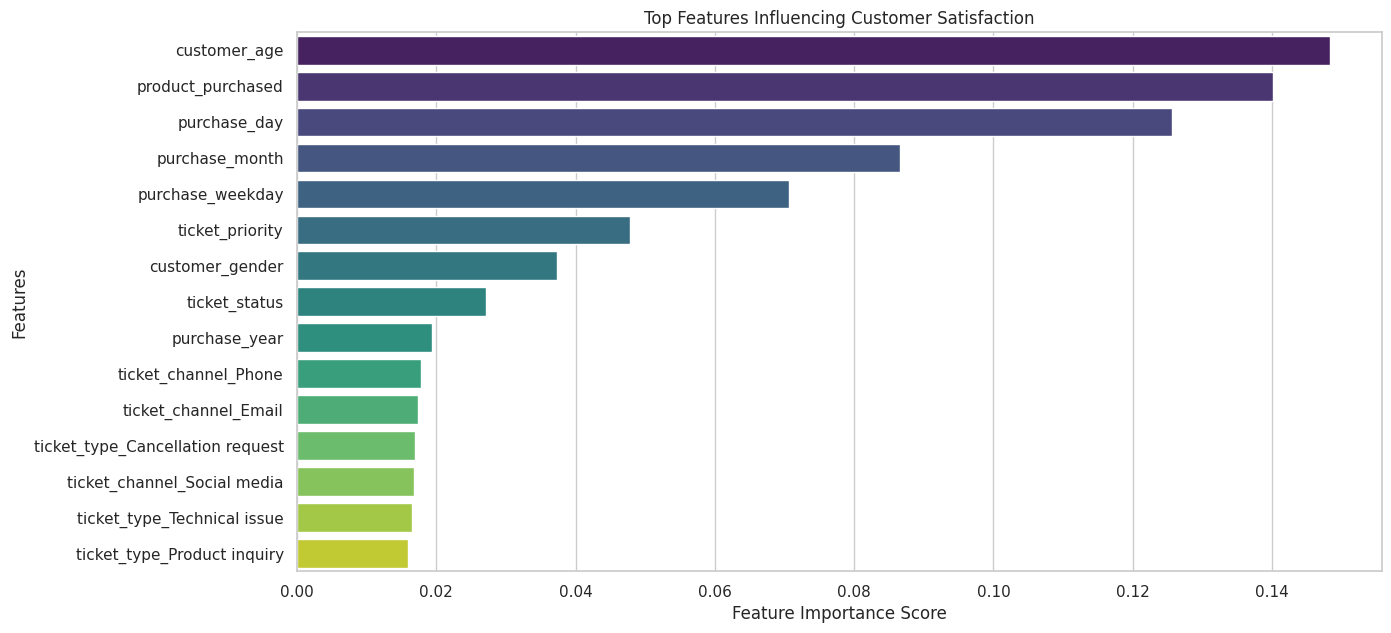

customer_age                               0.148337
product_purchased                          0.140179
purchase_day                               0.125625
purchase_month                             0.086543
purchase_weekday                           0.070703
ticket_priority                            0.047769
customer_gender                            0.037275
ticket_status                              0.027102
purchase_year                              0.019393
ticket_channel_Phone                       0.017753
ticket_channel_Email                       0.017389
ticket_type_Cancellation request           0.016938
ticket_channel_Social media                0.016810
ticket_type_Technical issue                0.016591
ticket_type_Product inquiry                0.015968
ticket_type_Refund request                 0.015849
ticket_subject_Delivery problem            0.012575
ticket_subject_Product recommendation      0.011863
ticket_subject_Payment issue               0.011543
ticket_subje

In [413]:
# Define features (X) and target variable (y)
X = dff.drop(columns=['ticket_id', 'customer_satisfaction_rating'])  # Remove ID and target variable
y = dff['customer_satisfaction_rating']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(14, 7))
sns.barplot(x=feature_importance[:15], y=feature_importance.index[:15], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features Influencing Customer Satisfaction")
plt.show()


print(feature_importance)

## 🔍 Key Factors Impacting Customer Satisfaction

The following features significantly influence customer satisfaction levels. Understanding these factors helps optimize customer service strategies.

### 📊 Top Influential Factors:

| **Feature**                        | **Impact Score** |
|-------------------------------------|------------------|
| **Customer Age**                    | 0.1483  |
| **Product Purchased**                | 0.1402  |
| **Purchase Day**                     | 0.1256  |
| **Purchase Month**                   | 0.0865  |
| **Purchase Weekday**                 | 0.0707  |
| **Ticket Priority**                  | 0.0478  |
| **Customer Gender**                  | 0.0373  |
| **Ticket Status**                    | 0.0271  |

### 📢 Insights & Recommendations:
- **Customer Age & Product Purchased are the most influential factors**, suggesting that different age groups perceive product satisfaction differently.
- **Purchase Timing (day, month, weekday) affects satisfaction**, indicating that external factors like promotions or seasonality might play a role.
- **Ticket Priority & Status impact satisfaction**, emphasizing the need for faster and prioritized issue resolution.
- **Communication Channel Matters**: Phone (0.0178), Email (0.0174), and Social Media (0.0168) influence satisfaction, so optimizing these support channels is crucial.
- **Common Ticket Types & Subjects also play a role**, meaning frequent issues like refunds, technical problems, and product inquiries require better handling.

### 🎯 Actionable Steps:
1. **Improve support for older customers** if age plays a crucial role.
2. **Analyze top-performing products** to understand what drives higher satisfaction.
3. **Optimize ticket resolution workflows** to enhance priority handling.
4. **Enhance customer support on critical channels** like social media and email.

# **📊 Customer Service Improvements Based on Findings**
---

## **🔍 1. Address Low-Satisfaction Customers Proactively**
### **Findings:**
- High dissatisfaction in certain categories (class "0" and "2").  
- Low recall for dissatisfied customers.  

### **Actionable Steps:**
✅ **Prioritize high-risk customers** based on early ticket signals (e.g., response delays, unresolved complaints).  
✅ **Proactive outreach**: Assign VIP support agents to handle high-risk cases before escalation.  
✅ **Personalized follow-ups**: Automate reminders for unresolved tickets & offer compensation (discounts, priority service).  

---

## **⏳ 2. Reduce First Response & Resolution Time**
### **Findings:**
- First response time & resolution time might be key predictors of satisfaction.  

### **Actionable Steps:**
✅ **Improve SLA compliance**: Set strict targets for response/resolution times.  
✅ **AI Chatbots for Instant Support**: Use chatbots for FAQs to reduce agent workload.  
✅ **Auto-assign tickets based on urgency**: Critical issues should be **escalated** to senior agents faster.  

---

## **🧠 3. Train Agents on Critical Problem Areas**
### **Findings:**
- Some issues may be **recurring**, causing repeated dissatisfaction.  

### **Actionable Steps:**
✅ **Analyze common ticket topics** that lead to negative satisfaction.  
✅ **Train agents on frequent complaint areas** to reduce resolution time.  
✅ **Real-time agent assistance**: AI-powered suggestions for responses during live chats.  

---

## **📊 4. Improve Ticket Categorization & Routing**
### **Findings:**
- Some tickets might be misclassified, leading to longer resolution times.  

### **Actionable Steps:**
✅ **Use NLP to auto-categorize tickets** and direct them to the right department.  
✅ **Introduce priority-based routing**: Critical complaints (e.g., payment issues) go directly to senior agents.  

---

## **📢 5. Gather More Customer Feedback**
### **Findings:**
- Satisfaction scores may not capture **customer sentiment** fully.  

### **Actionable Steps:**
✅ **Introduce post-resolution feedback surveys** for real-time improvement.  
✅ **Monitor sentiment in customer comments** using NLP for deeper insights.  
✅ **Encourage self-service options** for common issues (FAQs, knowledge base).  

---

## **🚀 Final Recommendations**
1️⃣ **Proactively identify & resolve high-risk cases**  
2️⃣ **Reduce first response & resolution times** with automation  
3️⃣ **Improve agent training on frequent complaints**  
4️⃣ **Enhance ticket routing with AI-powered categorization**  
5️⃣ **Gather continuous feedback & monitor sentiment**  


